### 安装 <a href="http://tushare.org/index.html">tushare</a> 
    pip install tushare
 

In [123]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as talib
import pandas as pd
import datetime as dt


df = ts.get_k_data('002408', ktype='60',autype="qfq",index=False)

#RSI
df["rsi"] = talib.RSI(df['close'].values, timeperiod=9)
df["macd"],df["signal"],df["hist"] = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
 


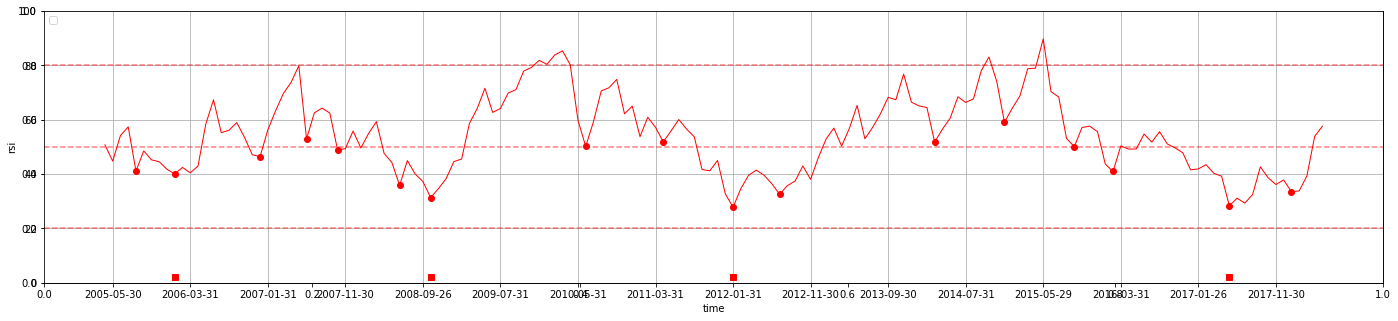

In [151]:
data = ts.get_k_data('002023', ktype='m',autype="qfq",index=False,start='2001-01-01', end='2018-05-15')
#RSI
data["rsi"] = talib.RSI(data['close'].values, timeperiod=9)
#绘制RSI线图
 
fig, ax = plt.subplots(figsize=(24,5))
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))

plt.plot(data["date"],data["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 

rsi = data["rsi"]
#3日内的低点
rsi_Low= rsi[rsi<rsi.shift(3)][rsi<rsi.shift(2)][rsi<rsi.shift(1)][rsi<rsi.shift(-1)][rsi<rsi.shift(-2)][rsi<rsi.shift(-3)] 
rsi_Low = rsi_Low.dropna()
plt.plot(rsi_Low.index.values,rsi_Low.values,'o',color='red')

#低点的低点
rsi_Low_Low = rsi_Low    [ rsi_Low.shift(1) > rsi_Low ]   [ rsi_Low.shift(-1) > rsi_Low ]        
rsi_Low_Low= rsi_Low_Low.dropna()
plt.plot(rsi_Low_Low.index.values,rsi_Low_Low.values-rsi_Low_Low.values+2,'s',color='red')
plt.grid()


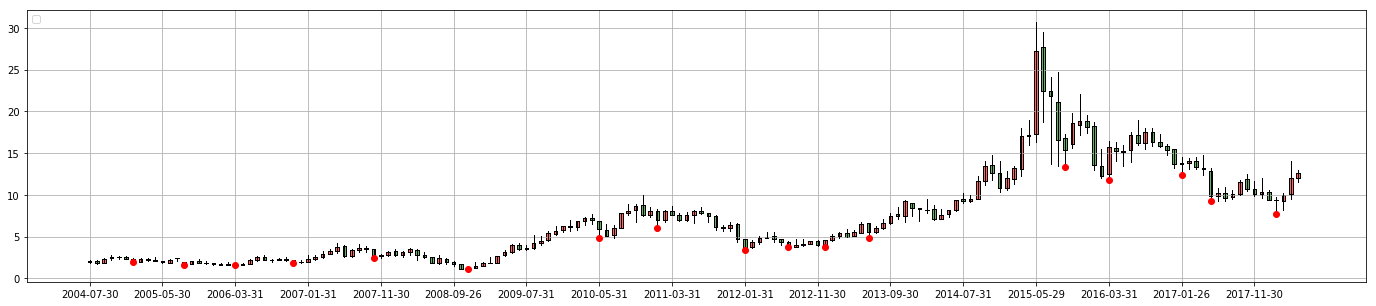

In [161]:
#绘制K线图
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],width=0.5, colorup='r', colordown='green',alpha=0.6)
plt.grid()

low = data["low"]
low_Low= low[low<low.shift(3)][low<=low.shift(2)][low<=low.shift(1)][low<=low.shift(-1)][low<=low.shift(-2)][low<=low.shift(-3)] 
low_Low = low_Low.dropna()
#画出低点
plt.plot(low_Low.index.values,low_Low.values,'o',color='red')

In [176]:
#找底背离点
 
#data[ data["low"].shift(1)>data["low"] ]  [ data["rsi"].shift(1)<data["rsi"]  ]
low_Low["rsi"]=data["rsi"]
low_Low["rsi"]
low_Low[0]

1.963

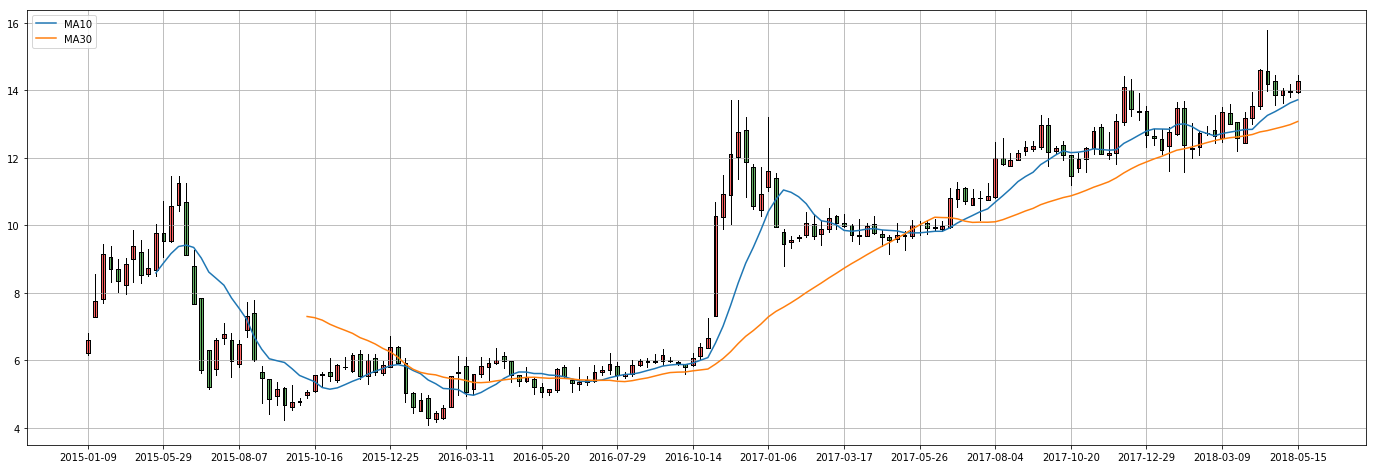

In [134]:

sma_10 = talib.SMA(np.array(data['close']), 10)
sma_30 = talib.SMA(np.array(data['close']), 30)

fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.plot(sma_10, label='MA10')
ax.plot(sma_30, label='MA30')
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],
                     width=0.5, colorup='r', colordown='green',
                     alpha=0.6)
plt.grid()